In [2]:
import matplotlib.pyplot as plt
from stylesynth import StyleSynth

In [3]:
# path for saving and loading diffusion model
MODEL_PATH = './stylesynth_diffusion_model.pt'

# clothing types to generate and display images for
CLOTHING_TYPES = [
    'Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
    'Sneaker', 'Bag', 'Boot']

# for displaying images
def display_images(imgs):
    num_rows = 2
    num_cols = len(CLOTHING_TYPES) // 2
    _, axes = plt.subplots(
        nrows=num_rows, ncols=num_cols,
        figsize=(num_cols * 2, num_rows * 2))
    for i in range(len(imgs)):
        row = i // num_cols
        col = i % num_cols
        axes[row, col].imshow(imgs[i])
        axes[row, col].axis('off')
        axes[row, col].set_title(f'{CLOTHING_TYPES[i]}')

INFO:StyleSynth_Logger:Loading Fashion MNIST dataset...
100%|██████████| 26.4M/26.4M [00:01<00:00, 17.2MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 274kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.99MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.3MB/s]
INFO:StyleSynth_Logger:Dataset loaded
INFO:StyleSynth_Logger:Training U-Net for noise prediction...
  0%|          | 0/35 [00:00<?, ?it/s]INFO:StyleSynth_Logger:Epoch 1 / 35
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.099190354347229


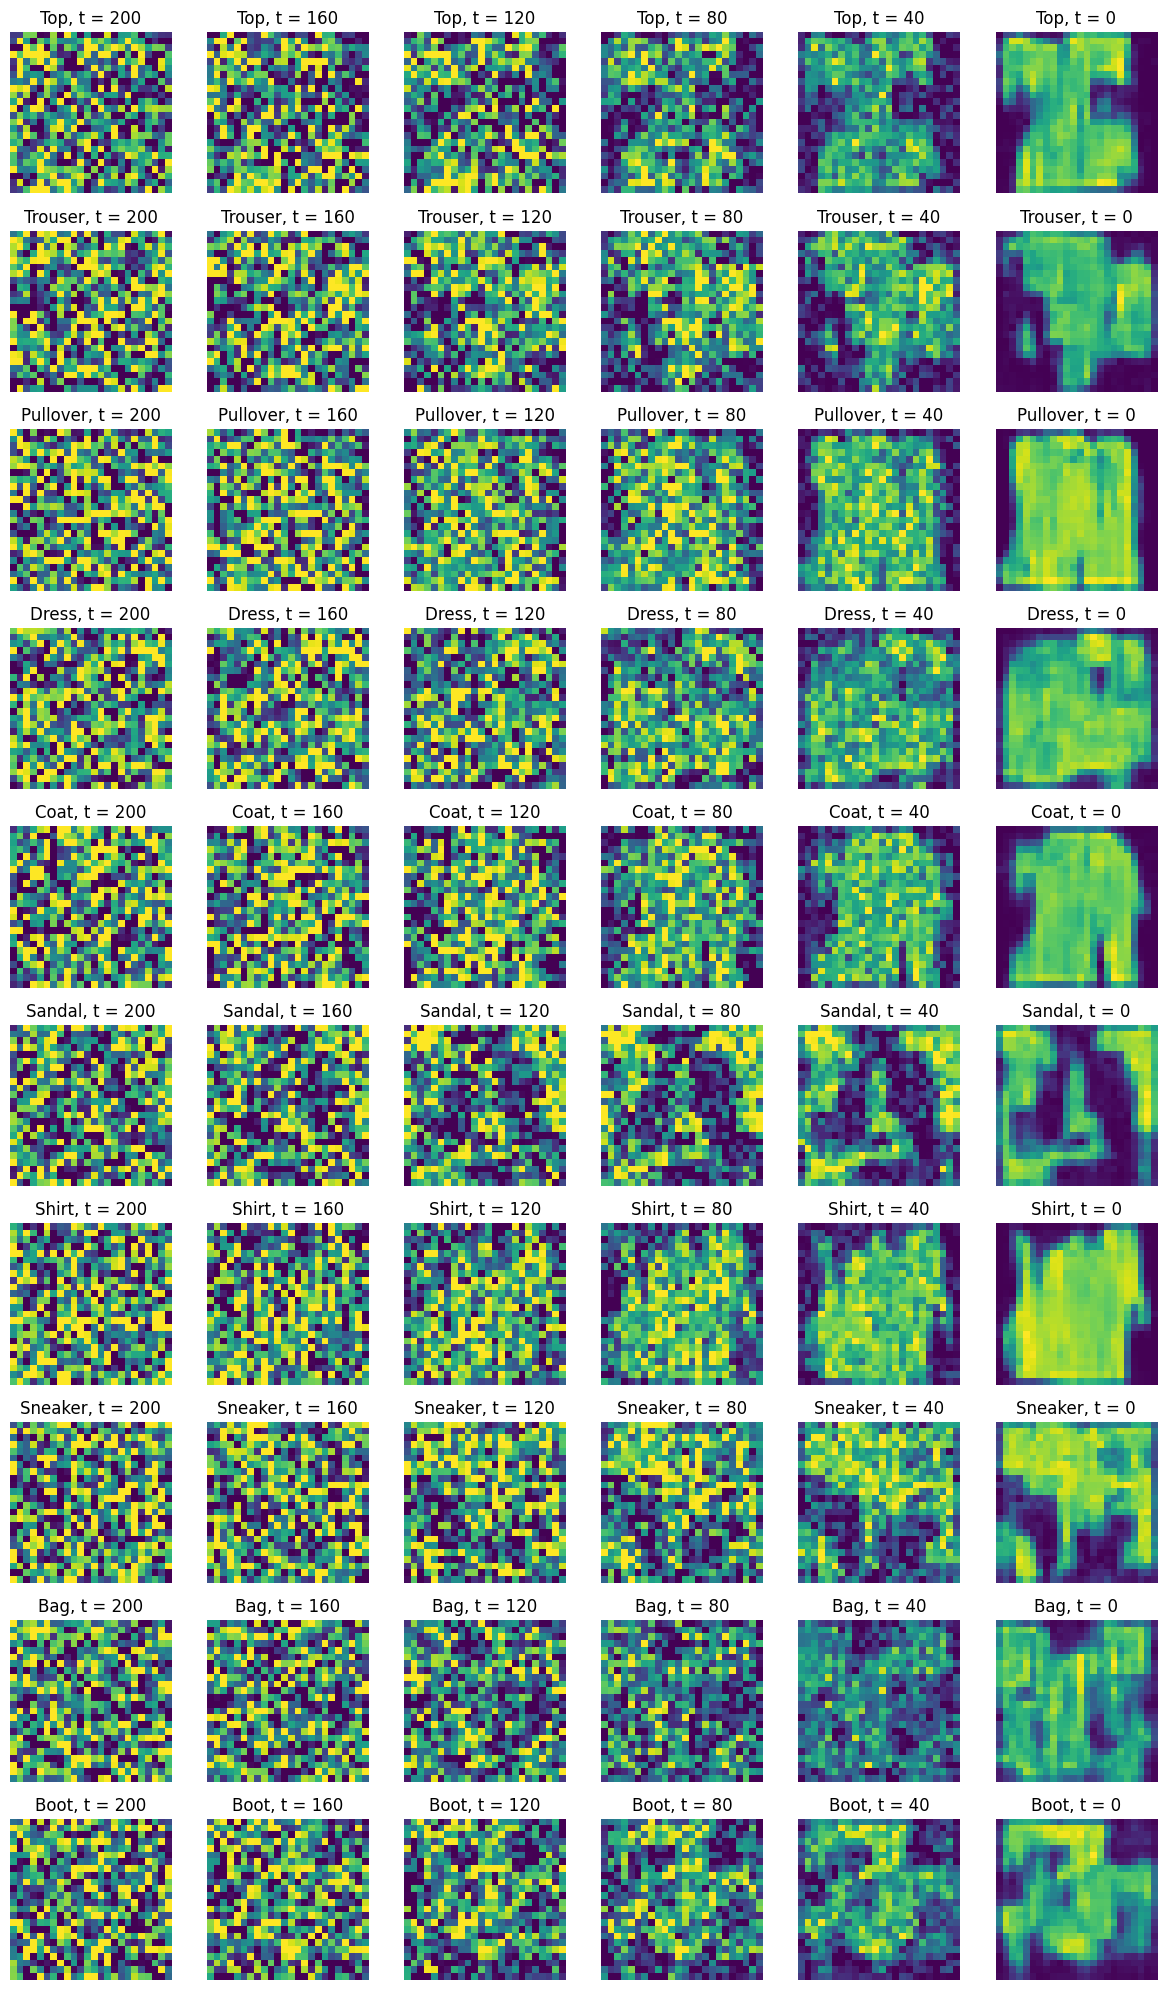

 26%|██▌       | 9/35 [10:01<28:36, 66.03s/it]INFO:StyleSynth_Logger:Epoch 10 / 35
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.06248561665415764


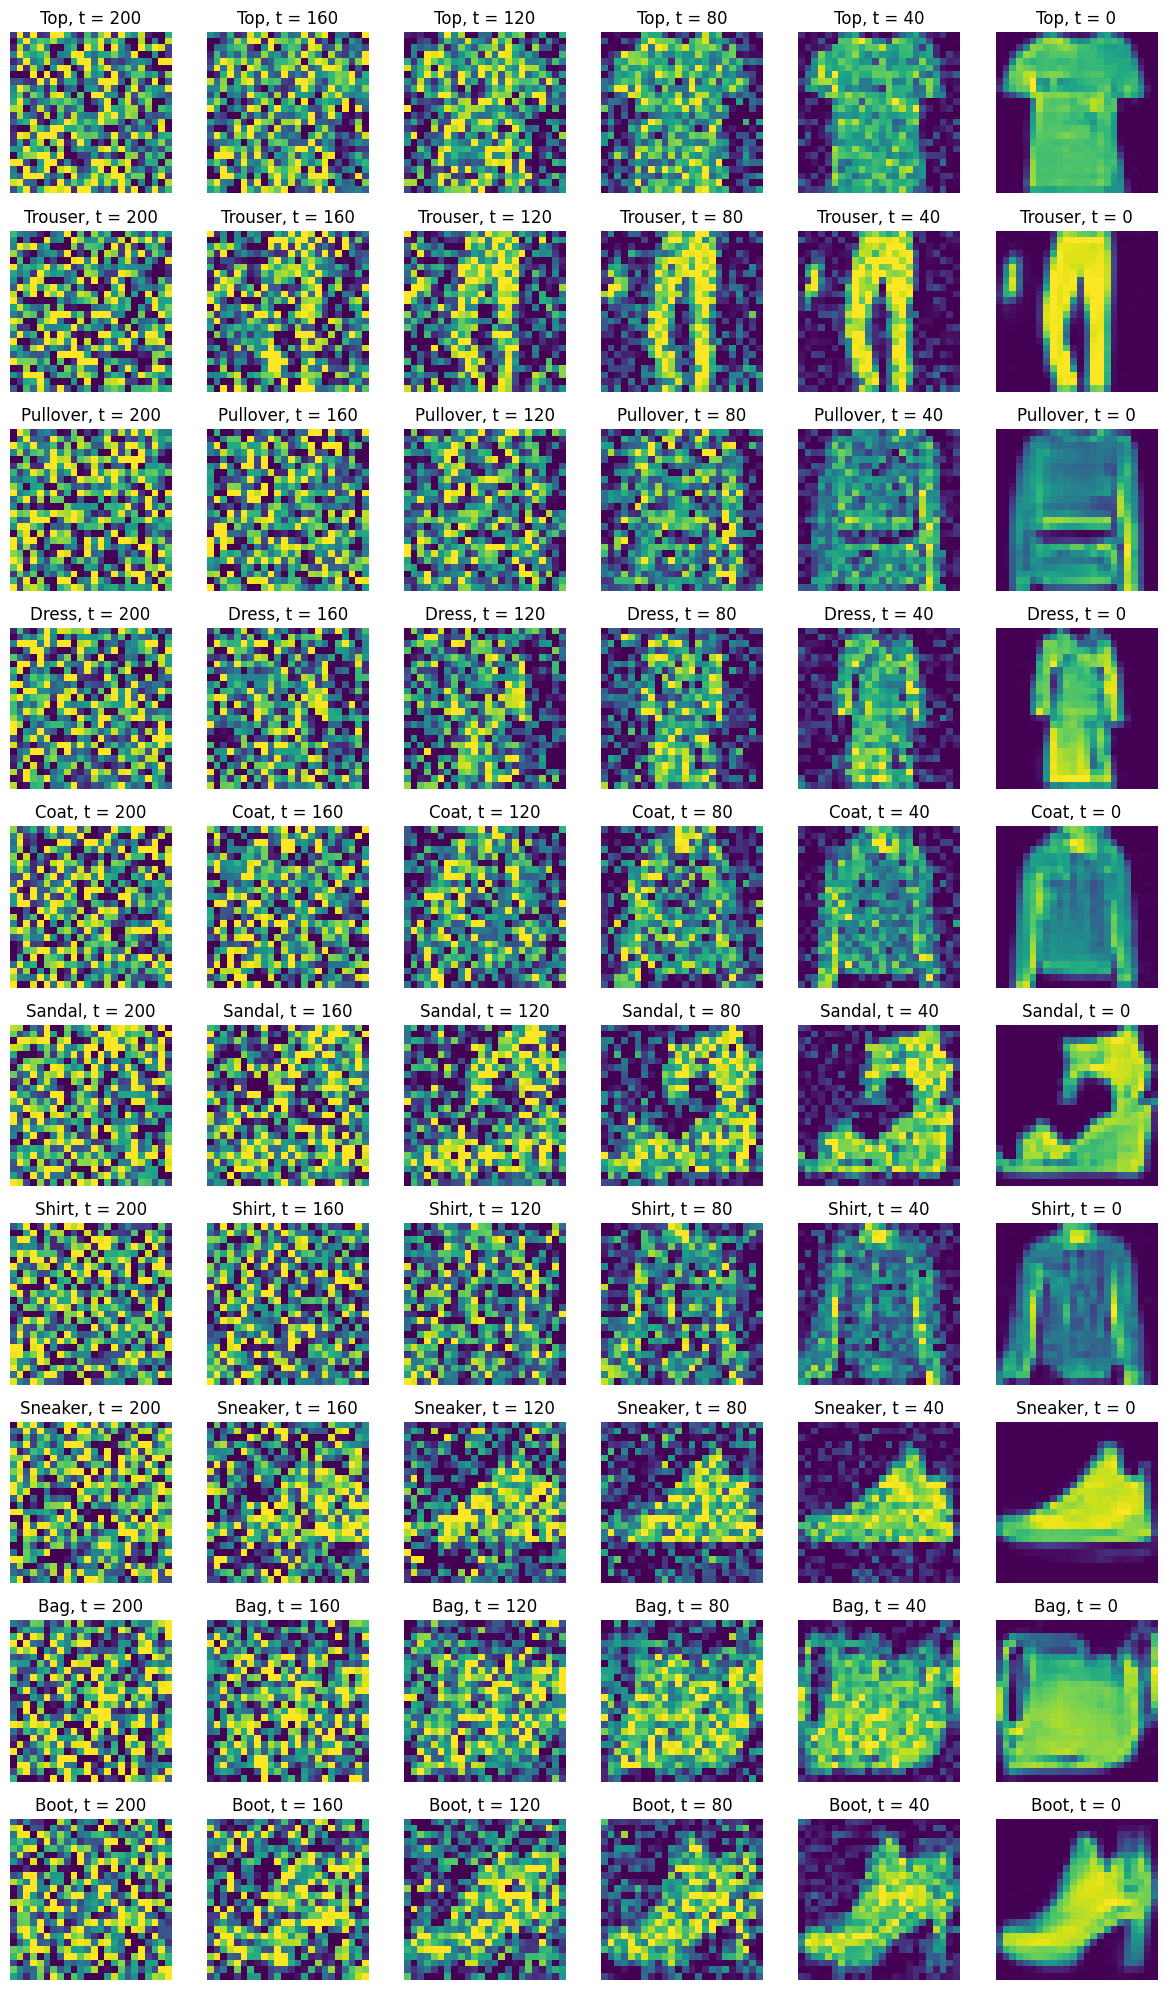

 54%|█████▍    | 19/35 [21:07<17:35, 65.98s/it]INFO:StyleSynth_Logger:Epoch 20 / 35
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.07092012465000153


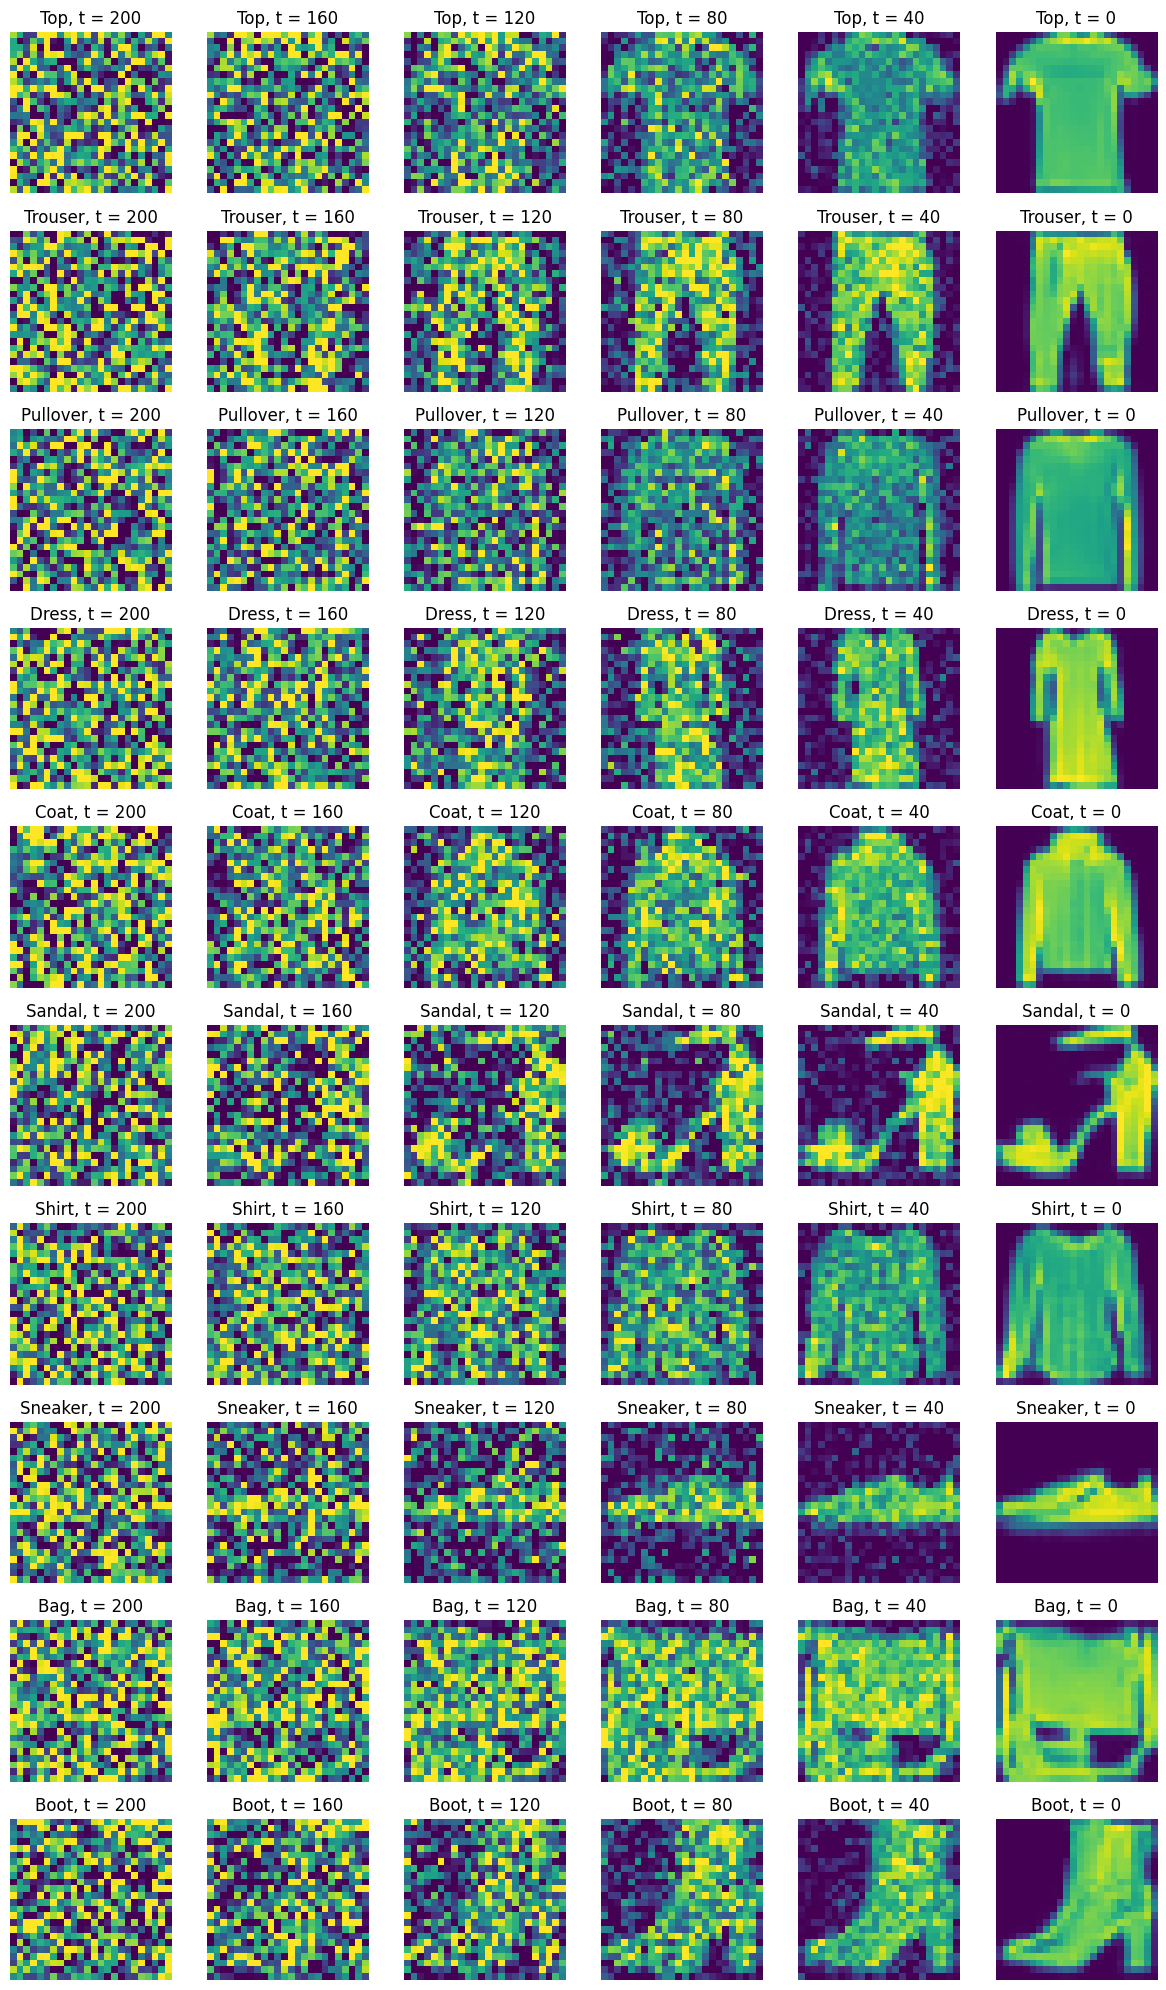

 83%|████████▎ | 29/35 [32:14<06:35, 65.99s/it]INFO:StyleSynth_Logger:Epoch 30 / 35
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.05969509854912758


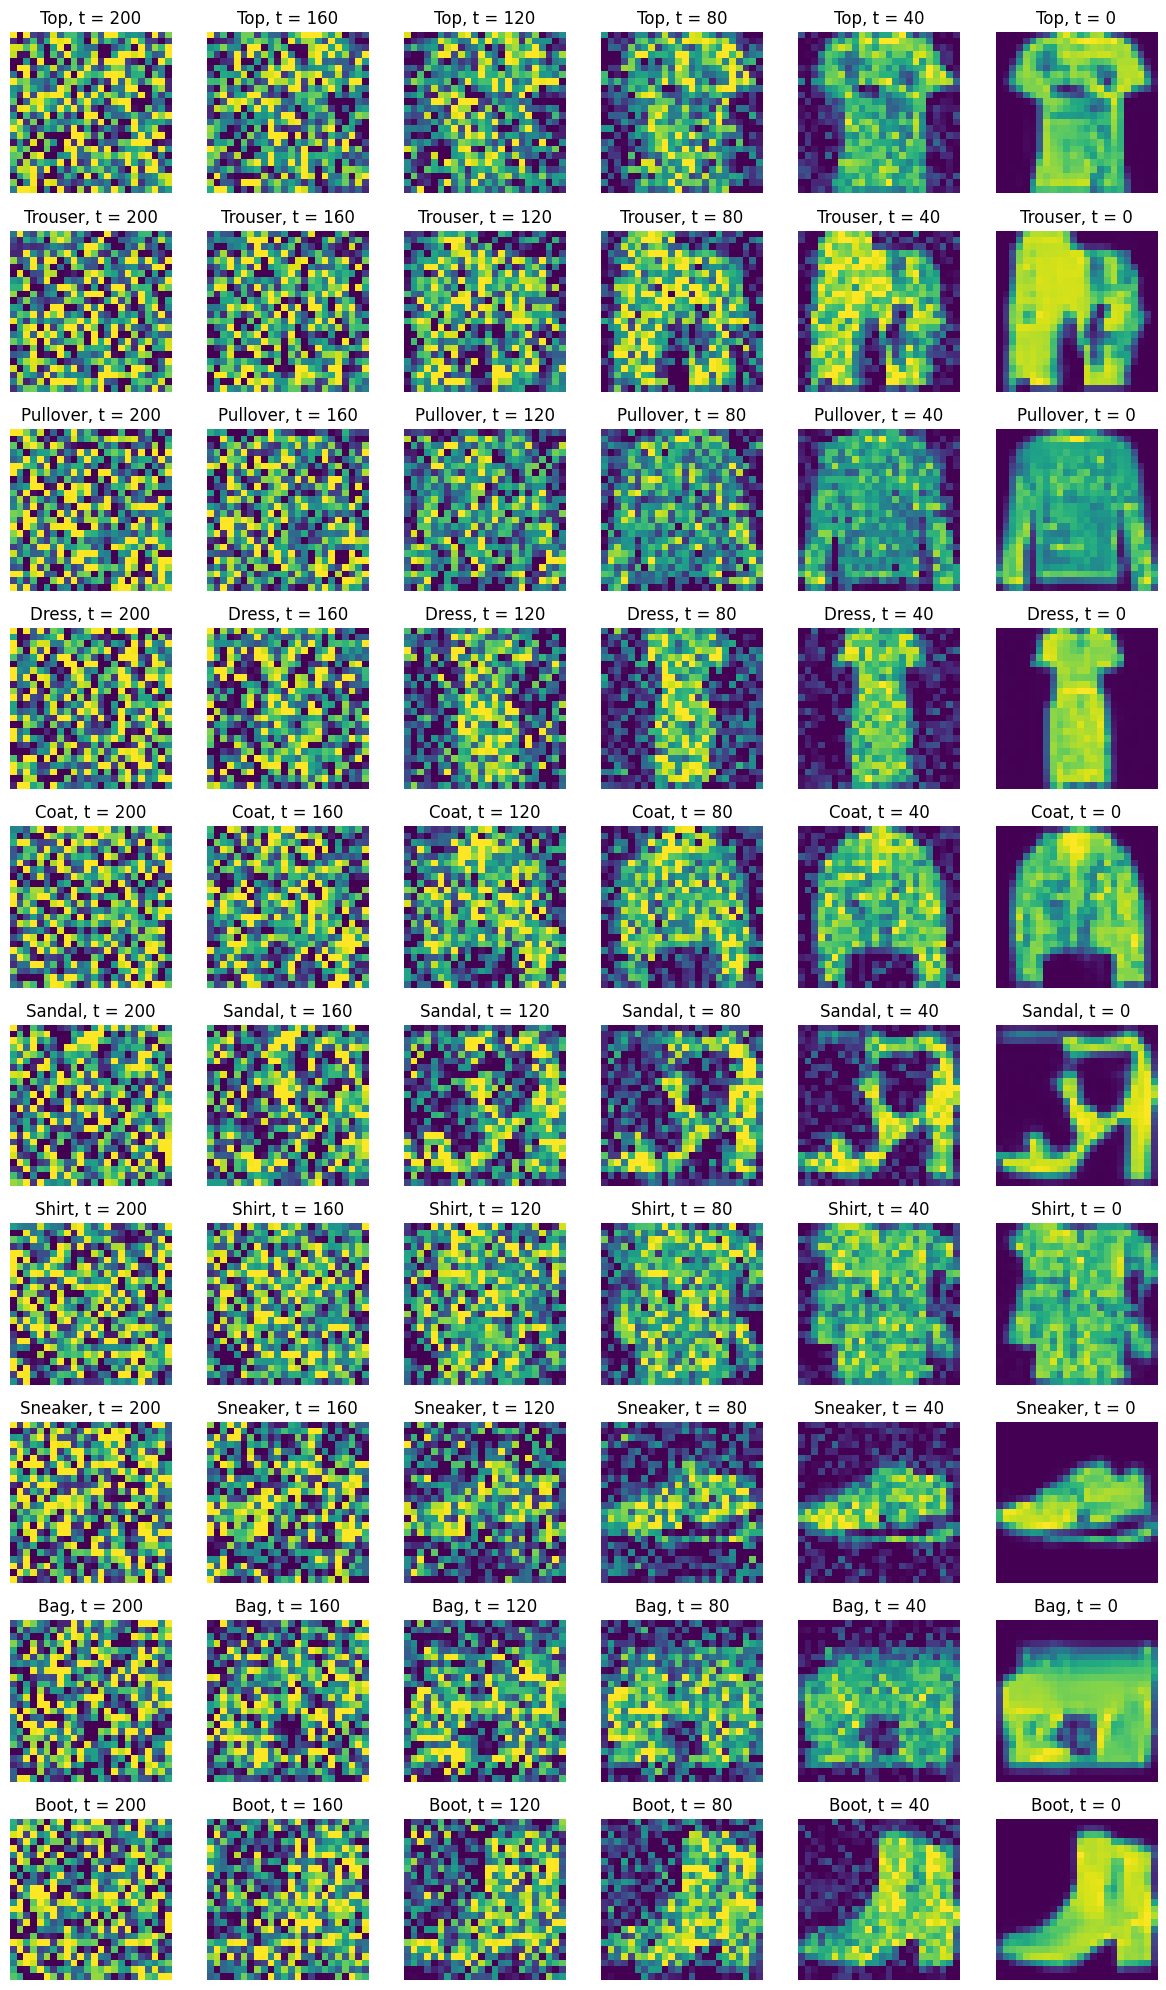

 97%|█████████▋| 34/35 [37:50<01:06, 66.44s/it]INFO:StyleSynth_Logger:Epoch 35 / 35
INFO:StyleSynth_Logger:Average loss across batch at final step of epoch: 0.06608802825212479


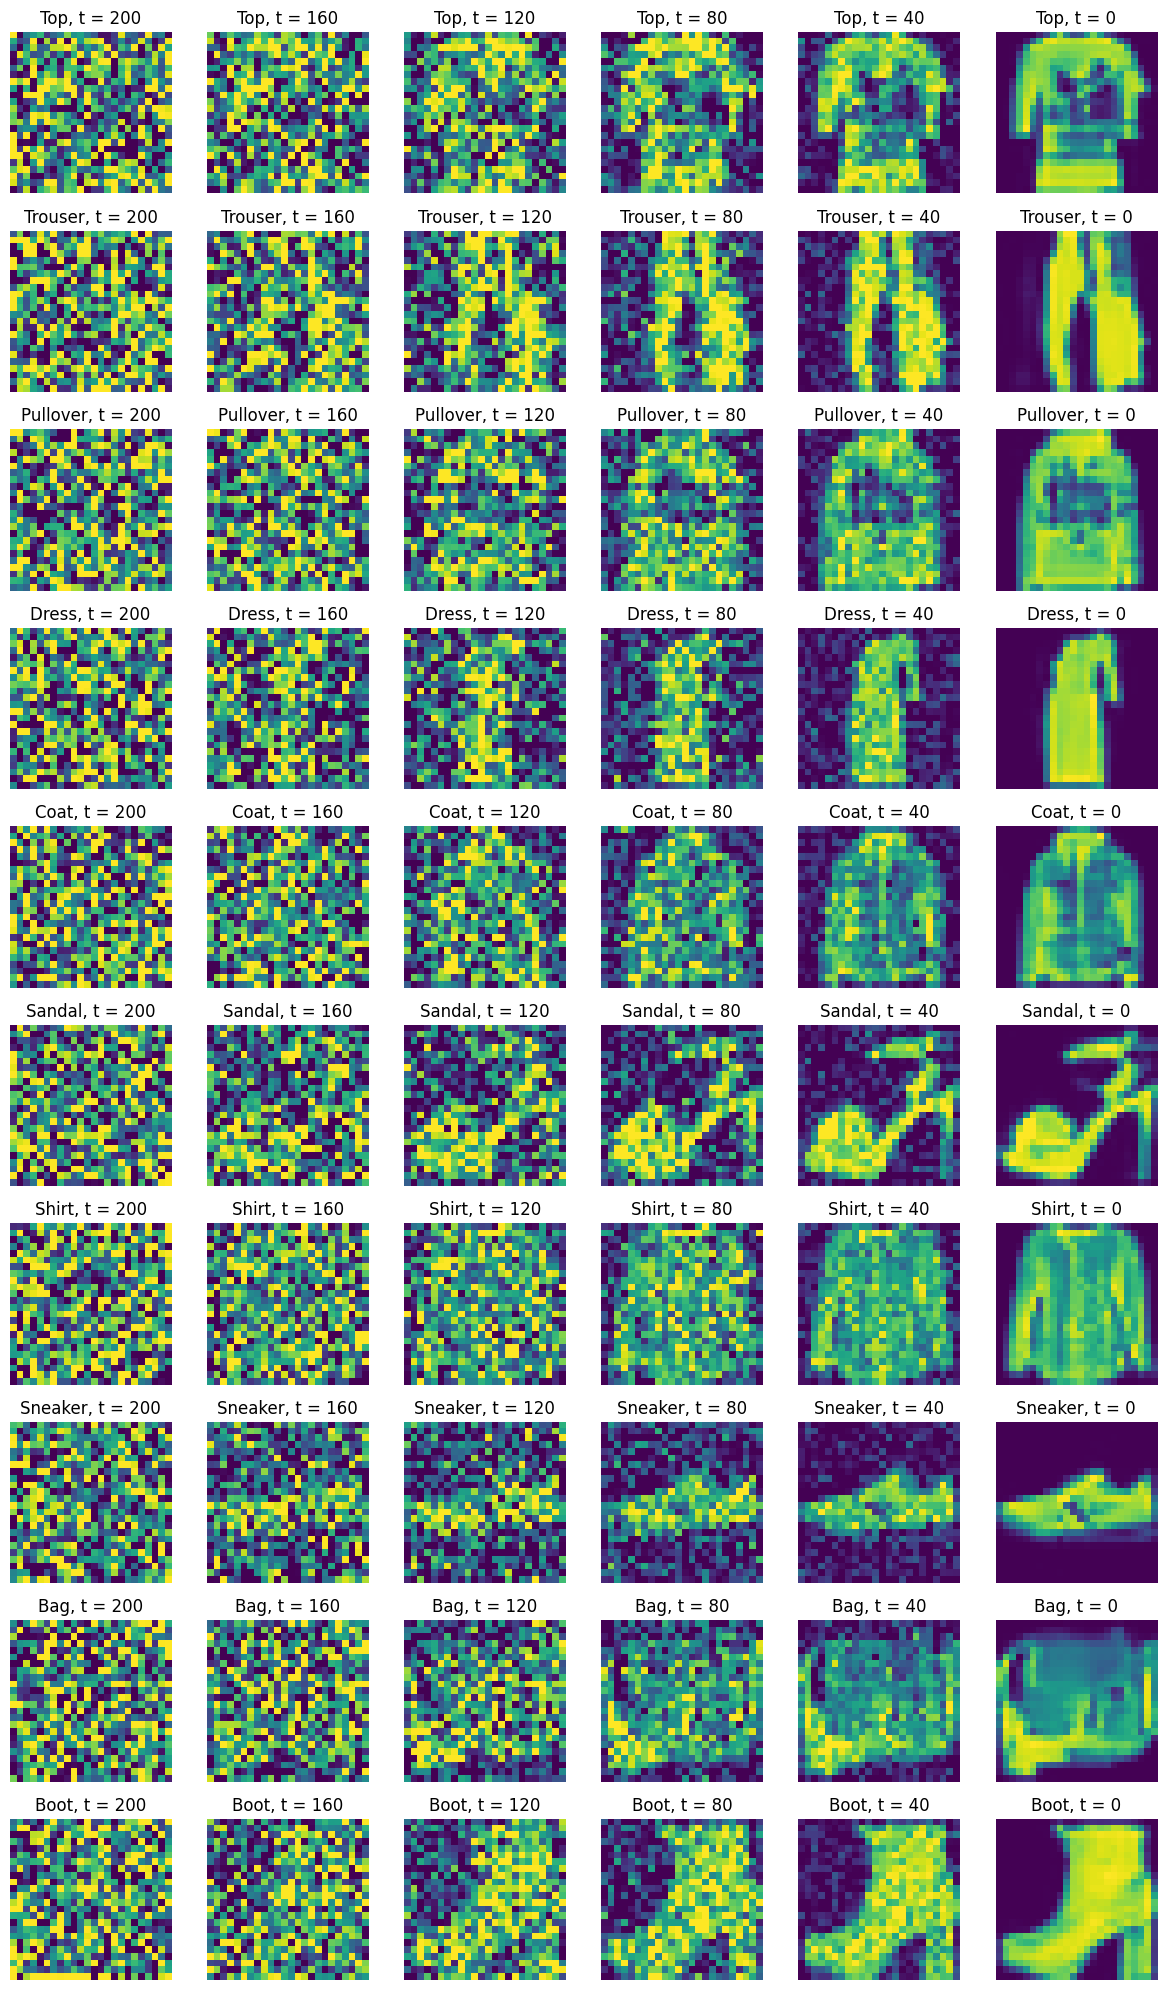

100%|██████████| 35/35 [39:04<00:00, 66.98s/it]
INFO:StyleSynth_Logger:Training complete


In [3]:
# train StyleSynth diffusion model
ss = StyleSynth()
ss.train(img_size=24, epochs=35, batch_size=128, vis_interval=10)

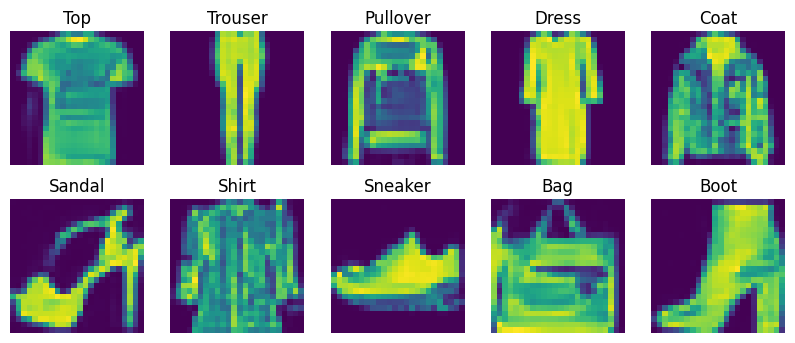

In [12]:
# generate and display images after training
imgs = ss.generate(CLOTHING_TYPES)
display_images(imgs)

In [13]:
# save StyleSynth diffusion model
ss.save(save_path=MODEL_PATH)

INFO:StyleSynth_Logger:Saved StyleSynth diffusion model to ./stylesynth_diffusion_model.pt


In [4]:
# load StyleSynth diffusion model
ss = StyleSynth()
ss.load(load_path=MODEL_PATH)

INFO:StyleSynth_Logger:Loaded StyleSynth diffusion model


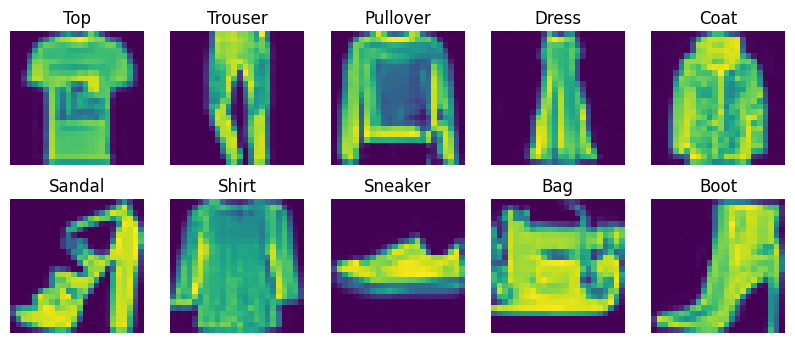

In [5]:
# generate and display images after loading
imgs = ss.generate(CLOTHING_TYPES)
display_images(imgs)